# Survey Geometry Tutorial
Consider the following situation: You are trying to create galaxy mocks of a survey geometry which spans a volume of $1.5\ \mathrm{Gpc}\ \times 0.25\ \mathrm{Gpc}\ \times\ 1.2\ \mathrm{Gpc}$. You have access to a simulation of a cubic volume of side length $1\ \mathrm{Gpc}$ with periodic boundary conditions. You wish to use cuboid remapping to transform the simulation particles into a shape amenable to the survey geometry. How do you do this?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cuboid_remap as cremap

In [2]:
geometry = [1.5, 0.25, 1.2] # desired dimensions of the cuboid
Lbox = 1.0 # length of the simulation box
Npart = 10000 # number of particles

# For this example, we will use a uniform distribution of particles in our simluation cube.
ppos = Lbox*np.random.rand(Npart, 3)

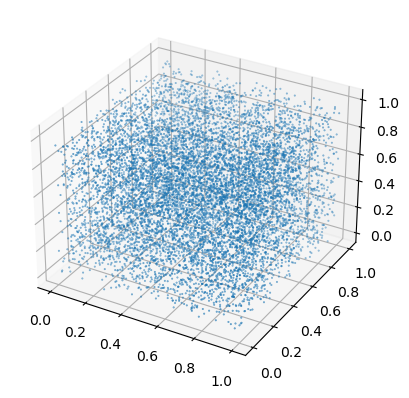

In [3]:
# We can plot the initial distribution of particles.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(ppos[:,0], ppos[:,1], ppos[:,2], s=0.2)

First, we need to find a configuration of lattice vectors which will give us a cuboid domain with the correct shape. We can do this by generating a set of all possible lattice vectors and then finding the one which gives us the cuboid domain of a satisfactory volume.

In [4]:
# Generate all possible lattice vectors with integer components less than or equal to 1
latvecs = cremap.generate_lattice_vectors(max_int=1)

# Print the possible cuboid side lengths
print("Possible cuboid side lengths:")
for key in latvecs.keys():
    print(f"{key}")

# Find one which encompasses the desired geometry
print('\nSatisfactory cuboid configuration:')
for key in latvecs.keys():
    if np.all(np.sort(key)[::-1] >= np.sort(geometry)[::-1]):
        break
print(f"{key}")

u1, u2, u3 = latvecs[key][0]
print(f"u1 = {u1}")
print(f"u2 = {u2}")
print(f"u3 = {u3}")

Possible cuboid side lengths:
(1.7320508075688772, 0.816496580927726, 0.7071067811865475)
(1.7320508075688772, 0.816496580927726, 0.7071067811865476)
(1.7320508075688772, 1.4142135623730951, 0.408248290463863)
(1.4142135623730951, 1.0, 0.7071067811865476)
(1.4142135623730951, 1.224744871391589, 0.5773502691896258)
(1.4142135623730951, 1.224744871391589, 0.5773502691896257)
(1.0, 1.0, 1.0)

Satisfactory cuboid configuration:
(1.7320508075688772, 1.4142135623730951, 0.408248290463863)
u1 = [-1 -1 -1]
u2 = [-1  0  1]
u3 = [-1  0  0]


In [5]:
# We can double check that the cuboid side lengths are correct
side_lengths = cremap.remap_Lbox(u1, u2, u3)
print(f"geometry = {np.sort(geometry)[::-1]}")
print(f"side lengths = {side_lengths}")

geometry = [1.5  1.2  0.25]
side lengths = (1.7320508075688772, 1.4142135623730951, 0.408248290463863)


(0.0, 1.0)

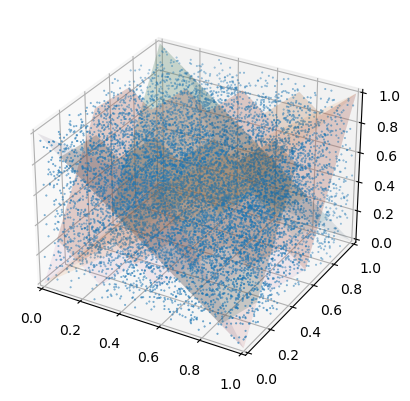

In [6]:
# We can plot the original particle distribution, as well as the planes of the tesselation
def construct_surface(normal, offset):
    # define plane
    xx, yy = np.meshgrid(np.linspace(0, Lbox, 10), np.linspace(0, Lbox, 10))
    zz = (-normal[0]*xx - normal[1]*yy - offset)*1./normal[2]
    zz[zz < 0] = np.nan
    zz[zz > Lbox] = np.nan
    return xx, yy, zz

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

cube = cremap.Cuboid(u1, u2, u3)
for i in range(len(cube.normals)):
    normal = cube.normals[i]
    d = cube.d[i]
    xx, yy, zz = construct_surface(normal, d)
    ax.plot_surface(xx, yy, zz, alpha=0.1)

ax.scatter(ppos[:,0], ppos[:,1], ppos[:,2], s=0.2)

ax.set_xlim(0, Lbox)
ax.set_ylim(0, Lbox)
ax.set_zlim(0, Lbox)

In [7]:
# Let's do the transformation!
pposT = cremap.remap(ppos, Lbox=Lbox, u1=u1, u2=u2, u3=u3)

(0.0, 2.0)

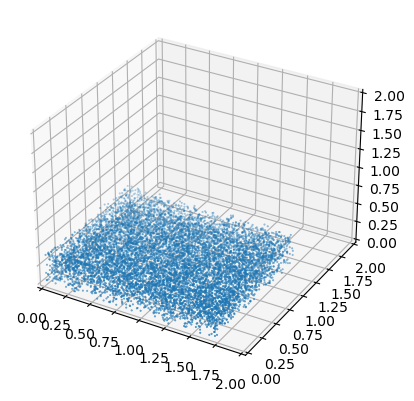

In [8]:
# We can plot the final distribution of particles.
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pposT[:,0], pposT[:,1], pposT[:,2], s=0.2)
ax.set_xlim(0, 2*Lbox)
ax.set_ylim(0, 2*Lbox)
ax.set_zlim(0, 2*Lbox)

Text(0, 0.5, 'z')

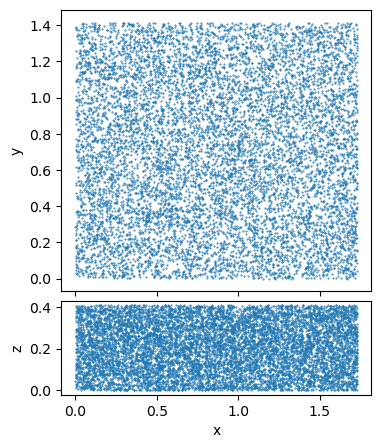

In [9]:
# We can plot the projections of the final distribution of particles in 2D.
fig = plt.figure(figsize=(4,5))
ax = fig.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05, 'height_ratios': [3,1]})
ax[0].scatter(pposT[:,0], pposT[:,1], s=0.2)
ax[0].set_ylabel('y')
ax[1].scatter(pposT[:,0], pposT[:,2], s=0.2)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')


Voila! We now have a uniform distribution of particles in a cuboid domain which is amenable to our survey geometry, derived from our simulation cube.